<a href="https://colab.research.google.com/github/CamilaSDantas/vacina_covid19_pernambuco/blob/main/8888VACINAPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
municipios = pd.read_csv('/content/drive/MyDrive/Covid19 dados tcc/tcc/coordmunicipios.csv')
idhm = pd.read_csv('/content/drive/MyDrive/001-VACINA/idhpe.csv', decimal=',')
covid = pd.read_csv('/content/drive/MyDrive/Covid19 dados tcc/PEdadosVACINA.csv',sep=';', decimal=',')

In [4]:
covid.head()

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,f2a49507-1215-412c-af15-bc198ec9f941-i0b0,31887a35f9788fc6f4b67634beead5e735baf76a4f73f3...,36.0,1985-02-16,M,3.0,PARDA,260530.0,10.0,EXU,BRASIL,PE,56230.0,B,2435799,MUNICIPIO DE EXU,UNIDADE DE SAUDE DA FAMILIA DO CENTRO I,260530,EXU,PE,201,Pessoas de 60 a 64 anos,2.0,Faixa Etária,FD7209,MINISTERIO DA SAUDE,Organization/00394544000851,2021-08-10,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,Novo PNI,2021-08-11T18:45:46.000Z,16341
1,fec72d41-b707-437c-9286-320e8d9fec12-i0b0,758a450a6eca97d274481584b30c456947a8a2a8e837de...,72.0,1948-08-15,F,3.0,PARDA,260845.0,10.0,LAGOA DO CARRO,BRASIL,PE,55820.0,B,2433001,PREFEITURA MUNICIPAL DE LAGOA DO CARRO,POLICLINICA SEVERINO NASCIMENTO CRUZ,260845,LAGOA DO CARRO,PE,203,Pessoas de 70 a 74 anos,2.0,Faixa Etária,210114,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-23,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-27T14:56:27.000Z,16341
2,0f28f593-d6c9-4be0-8ec3-4fd716cbe613-i0b0,f76aadad27f1aab693b105314ee28e7682941147f786ac...,59.0,1961-10-10,M,99.0,SEM INFORMACAO,260290.0,10.0,CABO DE SANTO AGOSTINHO,BRASIL,PE,NaN,B,20362,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,USF SACRAMENTO,260290,CABO DE SANTO AGOSTINHO,PE,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,ABW4735,MINISTERIO DA SAUDE,Organization/00394544000851,2021-06-03,1ª Dose,89,Covid-19-AstraZeneca,Novo PNI,2021-06-07T17:45:57.000Z,16341
3,0bc830d8-f280-43d2-b777-3b339d3a2c11-i0b0,b152bda3e59de654003c5c59fab10eced492c536a1412c...,71.0,1949-09-18,M,4.0,AMARELA,261640.0,10.0,VITORIA DE SANTO ANTAO,BRASIL,PE,55602.0,B,2638045,FUNDO MUNICIPAL DE SAUDE DE VITORIA DE SANTO A...,U S F ALTO JOSE LEAL,261640,VITORIA DE SANTO ANTAO,PE,203,Pessoas de 70 a 74 anos,2.0,Faixa Etária,210142,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-20,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-23T13:46:52.000Z,16341
4,2acd9afb-2191-4b92-918e-d9bd46078117-i0b0,2ee331cd395a0c0b098670832fa4fa6d3fb8752bd37a05...,27.0,1994-03-20,F,3.0,PARDA,261610.0,10.0,VERDEJANTE,BRASIL,PE,56120.0,B,2714736,PREFEITURA MUNICIPAL DE VERDEJANTE,UNIDADE DE SAUDE DA FAMILIA DE GROSSOS,261610,VERDEJANTE,PE,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,216VCD206Z,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-07-30,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-08-06T13:45:44.000Z,16341


In [5]:
municipios.head()

,Codmun,Município,latitude,longitude
0,260005,ABREU E LIMA,-7.90072,-34.8984
1,260010,AFOGADOS DA INGAZEIRA,-7.74312,-37631.0000
2,260020,AFRÂNIO,-8.51136,-41.0095
3,260030,AGRESTINA,-8.45966,-35.9447
4,260040,ÁGUA PRETA,-8.70609,-35.5263


In [6]:
idhm.head()

,Codmun6,Município,IDHM,IDHM_E,IDHM_L,IDHM_R
0,260005,ABREU E LIMA,0.679,0.632,0.791,0.625
1,260010,AFOGADOS DA INGAZEIRA,0.657,0.565,0.807,0.623
2,260020,AFRÂNIO,0.588,0.493,0.761,0.542
3,260030,AGRESTINA,0.592,0.470,0.760,0.581
4,260040,ÁGUA PRETA,0.553,0.432,0.761,0.514


In [7]:
idhm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Codmun6    171 non-null    int64  
 1   Município  171 non-null    object 
 2   IDHM       171 non-null    float64
 3   IDHM_E     170 non-null    float64
 4   IDHM_L     170 non-null    float64
 5   IDHM_R     170 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 8.1+ KB


In [8]:
colunas = ['paciente_idade', 'paciente_enumsexobiologico', 'paciente_racacor_valor','estabelecimento_municipio_codigo', 'paciente_endereco_nmmunicipio', 'vacina_grupoatendimento_nome', 'vacina_nome']
covid = covid[colunas]

In [9]:
covid.head()


,paciente_idade,paciente_enumsexobiologico,paciente_racacor_valor,estabelecimento_municipio_codigo,paciente_endereco_nmmunicipio,vacina_grupoatendimento_nome,vacina_nome
0,36.0,M,PARDA,260530,EXU,Pessoas de 60 a 64 anos,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...
1,72.0,F,PARDA,260845,LAGOA DO CARRO,Pessoas de 70 a 74 anos,Covid-19-Coronavac-Sinovac/Butantan
2,59.0,M,SEM INFORMACAO,260290,CABO DE SANTO AGOSTINHO,Pessoas de 18 a 64 anos,Covid-19-AstraZeneca
3,71.0,M,AMARELA,261640,VITORIA DE SANTO ANTAO,Pessoas de 70 a 74 anos,Covid-19-Coronavac-Sinovac/Butantan
4,27.0,F,PARDA,261610,VERDEJANTE,Pessoas de 18 a 64 anos,Vacina Covid-19 - Covishield


In [10]:
covid.dropna(subset= ['paciente_racacor_valor'], inplace = True)

In [11]:
covid.dropna( subset=['vacina_grupoatendimento_nome'], inplace=True )

In [12]:
covid.paciente_idade = covid.paciente_idade.astype('int64')

In [13]:
covid.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9304059 entries, 0 to 10056893
Data columns (total 7 columns):
 #   Column                            Dtype 
---  ------                            ----- 
 0   paciente_idade                    int64 
 1   paciente_enumsexobiologico        object
 2   paciente_racacor_valor            object
 3   estabelecimento_municipio_codigo  int64 
 4   paciente_endereco_nmmunicipio     object
 5   vacina_grupoatendimento_nome      object
 6   vacina_nome                       object
dtypes: int64(2), object(5)
memory usage: 567.9+ MB


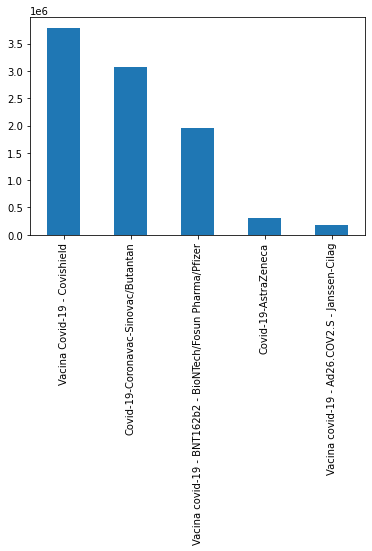

In [14]:
covid['vacina_nome'].value_counts().plot(kind='bar')

In [15]:
sexo = covid['paciente_enumsexobiologico'].value_counts()

In [16]:
sexo.head()

F    5119988
M    4184059
I         12
Name: paciente_enumsexobiologico, dtype: int64

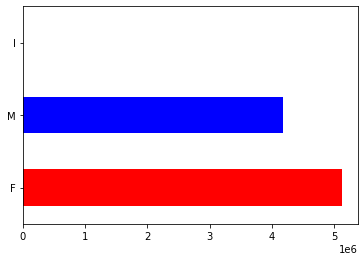

In [17]:
sexo.plot(kind='barh', color = ['red', 'blue'])

In [18]:
idhm.describe()

,Codmun6,IDHM,IDHM_E,IDHM_L,IDHM_R
count,171.000000,171.000000,170.000000,170.000000,170.000000
mean,260760.801170,0.595953,0.490206,0.755547,0.573976
std,431.933119,0.048275,0.069077,0.035587,0.047548
min,260005.000000,0.487000,0.354000,0.676000,0.477000
25%,260396.000000,0.567000,0.440250,0.730250,0.543000
50%,260775.000000,0.593000,0.488500,0.758000,0.565500
75%,261135.000000,0.612500,0.523750,0.780500,0.595000
max,261520.000000,0.788000,0.748000,0.839000,0.798000


In [19]:
idhm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Codmun6    171 non-null    int64  
 1   Município  171 non-null    object 
 2   IDHM       171 non-null    float64
 3   IDHM_E     170 non-null    float64
 4   IDHM_L     170 non-null    float64
 5   IDHM_R     170 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 8.1+ KB


In [20]:
vacinacao = pd.merge(idhm,covid,left_on='Codmun6', right_on='estabelecimento_municipio_codigo')

In [23]:
vacinacao.head()

,Codmun6,Município,IDHM,IDHM_E,IDHM_L,IDHM_R,paciente_idade,paciente_enumsexobiologico,paciente_racacor_valor,estabelecimento_municipio_codigo,paciente_endereco_nmmunicipio,vacina_grupoatendimento_nome,vacina_nome
0,260005,ABREU E LIMA,0.679,0.632,0.791,0.625,48,M,SEM INFORMACAO,260005,RECIFE,Outros,Covid-19-Coronavac-Sinovac/Butantan
1,260005,ABREU E LIMA,0.679,0.632,0.791,0.625,53,M,PRETA,260005,JABOATAO DOS GUARARAPES,Ensino Básico,Vacina Covid-19 - Covishield
2,260005,ABREU E LIMA,0.679,0.632,0.791,0.625,26,M,SEM INFORMACAO,260005,IGARASSU,Pessoas de 60 a 64 anos,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...
3,260005,ABREU E LIMA,0.679,0.632,0.791,0.625,59,F,AMARELA,260005,ABREU E LIMA,Diabetes Mellitus,Vacina Covid-19 - Covishield
4,260005,ABREU E LIMA,0.679,0.632,0.791,0.625,34,F,PARDA,260005,ABREU E LIMA,Pessoas de 60 a 64 anos,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...


In [24]:
colunas = ['Codmun6', 'Município', 'IDHM','paciente_idade', 'paciente_enumsexobiologico', 'paciente_racacor_valor', 'vacina_grupoatendimento_nome', 'vacina_nome']
vacinacao = vacinacao[colunas]

In [25]:
vacinacao.head()

,Codmun6,Município,IDHM,paciente_idade,paciente_enumsexobiologico,paciente_racacor_valor,vacina_grupoatendimento_nome,vacina_nome
0,260005,ABREU E LIMA,0.679,48,M,SEM INFORMACAO,Outros,Covid-19-Coronavac-Sinovac/Butantan
1,260005,ABREU E LIMA,0.679,53,M,PRETA,Ensino Básico,Vacina Covid-19 - Covishield
2,260005,ABREU E LIMA,0.679,26,M,SEM INFORMACAO,Pessoas de 60 a 64 anos,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...
3,260005,ABREU E LIMA,0.679,59,F,AMARELA,Diabetes Mellitus,Vacina Covid-19 - Covishield
4,260005,ABREU E LIMA,0.679,34,F,PARDA,Pessoas de 60 a 64 anos,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...


In [26]:
mapape = gpd.read_file('/content/drive/MyDrive/001-VACINA/PE_Mun97_region.shx')

In [27]:
mapape.head()

,CODMUN6,MUNIC_PIO,SEM_ACENTO,MUNIC_PI0,UF,UF_IBGE,REGI_O,MESO_IBGE,MESO_IBG0,MICRO_IBGE,MICRO_IB0,MESO_IBG1,MICRO_IB1,AREA_97,SEDE,SEDE0,N91,N96,CODCOMP,geometry
0,260020,AFRÂNIO,AFRANIO,2600203,PE,26,NE,SAO FRANCISCO PERNAMBUCANO,02,PETROLINA,005,2602,260205,1482.423,-41.005,-8.515,13544.0,13886.0,260200500203,"POLYGON ((-41.35756 -8.70651, -41.34930 -8.707..."
1,261110,PETROLINA,PETROLINA,2611101,PE,26,NE,SAO FRANCISCO PERNAMBUCANO,02,PETROLINA,005,2602,260205,4737.130,-40.508,-9.393,0.0,191238.0,260200511101,"POLYGON ((-40.96774 -8.82765, -40.96902 -8.823..."
2,260515,DORMENTES,DORMENTES,2605152,PE,26,NE,SAO FRANCISCO PERNAMBUCANO,02,PETROLINA,005,2602,260205,1386.278,-40.771,-8.447,13862.0,13252.0,260200505152,"POLYGON ((-40.86886 -8.36169, -40.86644 -8.362..."
3,260110,ARARIPINA,ARARIPINA,2601102,PE,26,NE,SERTAO PERNAMBUCANO,01,ARARIPINA,001,2601,260101,1906.338,-40.498,-7.576,63453.0,63841.0,260100101102,"POLYGON ((-40.71240 -7.47108, -40.70989 -7.465..."
4,261245,SANTA CRUZ,SANTA CRUZ,2612455,PE,26,NE,SERTAO PERNAMBUCANO,01,ARARIPINA,001,2601,260101,1426.077,-40.336,-8.240,10590.0,10904.0,260100112455,"POLYGON ((-40.55131 -8.28434, -40.55185 -8.281..."


In [28]:
mapape.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CODMUN6     185 non-null    object  
 1   MUNIC_PIO   185 non-null    object  
 2   SEM_ACENTO  185 non-null    object  
 3   MUNIC_PI0   185 non-null    object  
 4   UF          185 non-null    object  
 5   UF_IBGE     185 non-null    object  
 6   REGI_O      185 non-null    object  
 7   MESO_IBGE   185 non-null    object  
 8   MESO_IBG0   185 non-null    object  
 9   MICRO_IBGE  185 non-null    object  
 10  MICRO_IB0   185 non-null    object  
 11  MESO_IBG1   185 non-null    object  
 12  MICRO_IB1   185 non-null    object  
 13  AREA_97     185 non-null    float64 
 14  SEDE        185 non-null    float64 
 15  SEDE0       185 non-null    float64 
 16  N91         185 non-null    float64 
 17  N96         185 non-null    float64 
 18  CODCOMP     185 non-null    object  
 19  

In [29]:
mapape.CODMUN6 = mapape.CODMUN6.astype('int64')

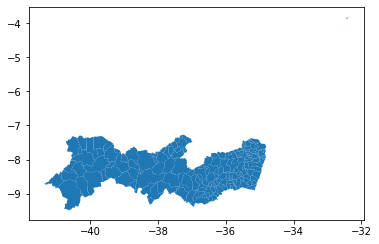

In [30]:
mapape.plot()

In [31]:
vacinacaope = mapape.merge(vacinacao, left_on= 'CODMUN6', right_on='Codmun6')

In [32]:
vacinacaope.head()

,CODMUN6,MUNIC_PIO,SEM_ACENTO,MUNIC_PI0,UF,UF_IBGE,REGI_O,MESO_IBGE,MESO_IBG0,MICRO_IBGE,MICRO_IB0,MESO_IBG1,MICRO_IB1,AREA_97,SEDE,SEDE0,N91,N96,CODCOMP,geometry,Codmun6,Município,IDHM,paciente_idade,paciente_enumsexobiologico,paciente_racacor_valor,vacina_grupoatendimento_nome,vacina_nome
0,260020,AFRÂNIO,AFRANIO,2600203,PE,26,NE,SAO FRANCISCO PERNAMBUCANO,02,PETROLINA,005,2602,260205,1482.423,-41.005,-8.515,13544.0,13886.0,260200500203,"POLYGON ((-41.35756 -8.70651, -41.34930 -8.707...",260020,AFRÂNIO,0.588,52,M,BRANCA,Pessoas de 18 a 64 anos,Covid-19-AstraZeneca
1,260020,AFRÂNIO,AFRANIO,2600203,PE,26,NE,SAO FRANCISCO PERNAMBUCANO,02,PETROLINA,005,2602,260205,1482.423,-41.005,-8.515,13544.0,13886.0,260200500203,"POLYGON ((-41.35756 -8.70651, -41.34930 -8.707...",260020,AFRÂNIO,0.588,41,F,SEM INFORMACAO,Pessoas de 60 a 64 anos,Covid-19-Coronavac-Sinovac/Butantan
2,260020,AFRÂNIO,AFRANIO,2600203,PE,26,NE,SAO FRANCISCO PERNAMBUCANO,02,PETROLINA,005,2602,260205,1482.423,-41.005,-8.515,13544.0,13886.0,260200500203,"POLYGON ((-41.35756 -8.70651, -41.34930 -8.707...",260020,AFRÂNIO,0.588,37,M,PARDA,Pessoas de 18 a 64 anos,Covid-19-Coronavac-Sinovac/Butantan
3,260020,AFRÂNIO,AFRANIO,2600203,PE,26,NE,SAO FRANCISCO PERNAMBUCANO,02,PETROLINA,005,2602,260205,1482.423,-41.005,-8.515,13544.0,13886.0,260200500203,"POLYGON ((-41.35756 -8.70651, -41.34930 -8.707...",260020,AFRÂNIO,0.588,62,M,BRANCA,Pessoas de 18 a 64 anos,Covid-19-Coronavac-Sinovac/Butantan
4,260020,AFRÂNIO,AFRANIO,2600203,PE,26,NE,SAO FRANCISCO PERNAMBUCANO,02,PETROLINA,005,2602,260205,1482.423,-41.005,-8.515,13544.0,13886.0,260200500203,"POLYGON ((-41.35756 -8.70651, -41.34930 -8.707...",260020,AFRÂNIO,0.588,44,M,SEM INFORMACAO,Pessoas de 18 a 64 anos,Vacina Covid-19 - Covishield


In [ ]:
vacinacaope.plot(colunas = 'MESO_IBGE',legend= True, figsize(20,20))